# Feature Selection for Draft 3 (Schaefer)

In [1]:
%load_ext autoreload
%autoreload 2

# Imports
from sklearn.feature_selection import SelectFromModel, VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pathlib
import os
import re

from ToolBox.neuro import stats, plot, wrangling


# Define paths
class PATH:
    STUDY = pathlib.Path('.').parent.resolve()
    FEATURES = STUDY.joinpath('data/statistics-desikan/features')
    FIGURES = STUDY.joinpath('figures')
    RESULTS = STUDY.joinpath('results')
    DEMO = STUDY.joinpath('data/CHARM/demographics.tsv')


In [2]:
def drop_low_variance(data: pd.DataFrame, thresh: float=0.0, 
                      na_replacement: int=-999):
    """
    Remove all low-variance features from a dataframe.
    """

    df = data.copy()
    selector = VarianceThreshold(thresh)
    selector.fit(df.fillna(na_replacement))

    print(f"Dropping {selector.get_support().sum()} features with low variance")
    print("The following features were dropped: \n",
          *[f'{x}\n' for x in df.columns[~selector.get_support()].tolist()],
          sep='\t')
    

    return df.loc[:, selector.get_support(indices=False)]

In [3]:
# Load demographics information
demo = pd.read_csv(str(PATH.DEMO), sep='\t')

# Load the computed features
features = wrangling.load_computed_measures(str(PATH.FEATURES), scale='global')

# Combine 
df = (demo
    .reset_index()
    .merge(features.reset_index(), on='index')
    .drop('index', axis=1)
    .set_index(demo.columns.tolist()))

# Drop low-variance features
df = drop_low_variance(df)

# Print features
print(f"Features ({df.shape[1]}): ",*[f'\t{x}' for x in df.columns], sep='\n')


df.head()

Dropping 26 features with low variance
The following features were dropped: 
	clustering_coefficient_neg_avg
	clustering_coefficient_zhang_neg_avg
	degree_betweenModule_neg_avg
	degree_interHemisphere_neg_avg
	degree_intraHemisphere_neg_avg
	degree_neg_avg
	degree_withinModule_neg_avg
	participation_coefficient_neg_avg
	strength_global_offDiagonal_neg
	strength_interHemisphere_global_neg
	strength_intraHemisphere_global_neg

Features (26): 
	assortativity
	characteristic_path_length
	clustering_coefficient_avg
	clustering_coefficient_zhang_avg
	degree_avg
	degree_betweenModule_avg
	degree_interHemisphere_avg
	degree_intraHemisphere_avg
	degree_withinModule_avg
	density
	diameter
	eccentricity_avg
	eigenvector_centrality_avg
	global_efficiency
	modularity_global
	modularity_global_neg
	node_betweenness_centrality_avg
	participation_coefficient_avg
	participation_coefficient_pos_avg
	radius
	strength_global
	strength_global_neg
	strength_global_offDiagonal
	strength_interHemisphere_globa

,,,,,,,assortativity,characteristic_path_length,clustering_coefficient_avg,clustering_coefficient_zhang_avg,degree_avg,degree_betweenModule_avg,degree_interHemisphere_avg,degree_intraHemisphere_avg,degree_withinModule_avg,density,...,node_betweenness_centrality_avg,participation_coefficient_avg,participation_coefficient_pos_avg,radius,strength_global,strength_global_neg,strength_global_offDiagonal,strength_interHemisphere_global,strength_intraHemisphere_global,strength_selfConnections_global
Subject,Sex,Age,DX,ADOS,SCQ,IQ,,,,,,,,,,,,,,,,,,,,,
R0006_V0021,Male,12.84,TDC,NaN,NaN,105.0,-0.039041,28.5706,0.003751,0.095019,71.9535,62.9767,32.0233,39.9302,8.97674,0.846512,...,0.038854,0.683936,0.683936,74.1047,2422950.0,787062.0,52.3084,4.86107,47.4473,787062.0
R0007_V0462,Male,13.49,ASD,6.0,19.0,122.0,-0.044211,25.2896,0.003726,0.081259,74.1163,64.9535,33.5116,40.6047,9.16279,0.871956,...,0.040584,0.690702,0.690702,45.9088,2164710.0,569282.0,51.7230,5.77906,45.9439,569282.0
R0023_V0771,Male,13.79,ASD,7.0,22.0,105.0,-0.039464,21.8185,0.004377,0.101079,75.2093,65.9535,33.8837,41.3256,9.25581,0.884815,...,0.041730,0.695746,0.695746,39.8195,2543180.0,722569.0,60.7260,5.63893,55.0870,722569.0
R0025_V0389,Female,10.77,ASD,7.0,11.0,127.0,-0.045113,34.2815,0.003127,0.070473,73.6279,64.6047,33.3023,40.3256,9.02326,0.866211,...,0.040199,0.704331,0.704331,79.7607,1839430.0,468258.0,40.7898,4.41943,36.3704,468258.0
R0028_V0064,Female,11.58,ASD,9.0,28.0,116.0,-0.032285,22.5269,0.003922,0.096336,77.1860,67.8605,36.2326,40.9535,9.32558,0.908071,...,0.042782,0.685582,0.685582,33.4638,2789050.0,834657.0,55.2338,5.58909,49.6447,834657.0


Accuracy: 62.77%


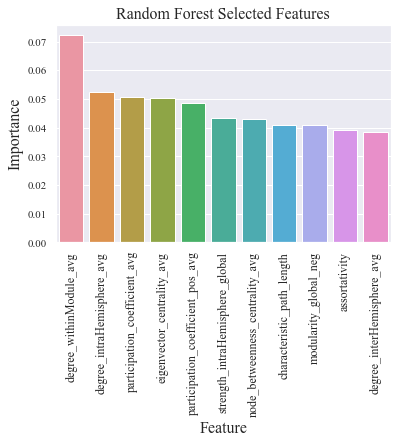

In [19]:
# Feature Selection

# Scale features
X = MinMaxScaler().fit_transform(df)
y = df.index.get_level_values('DX').to_numpy()

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

# Fit data to the model
clf = RandomForestClassifier(n_estimators=90, random_state=69)
clf.fit(X_train, y_train)
selector = SelectFromModel(clf, prefit=True)

# Extract features
selected = df.iloc[:, selector.get_support()]

# Importances
importance = pd.DataFrame({
    'feature': df.columns[selector.get_support()],
    'importance': clf.feature_importances_[selector.get_support()]
}).sort_values('importance', ascending=False)

# Evaluate performance
score = clf.score(X_test, y_test)*100
print(f'Accuracy: {score:.2f}%')

# Plot feature importances
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x='feature', y='importance', data=importance, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12);
ax.set_title(f'Random Forest Selected Features', fontsize=16)
ax.set_ylabel('Importance', fontsize=16)
ax.set_xlabel('Feature', fontsize=16)
plt.show()

In [22]:
set(df.columns[selector.get_support()]).intersection(df.columns[fs.get_support()])

{'assortativity',
 'degree_interHemisphere_avg',
 'degree_withinModule_avg',
 'eigenvector_centrality_avg',
 'node_betweenness_centrality_avg'}

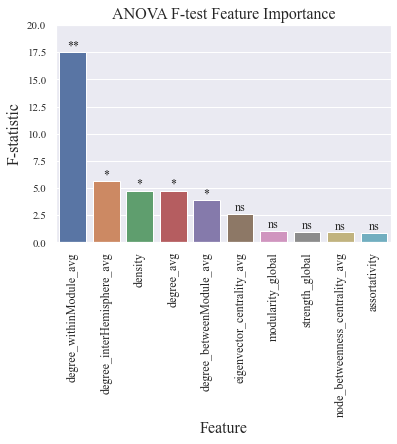

In [14]:
# Feature Selection

# Scale features
X = MinMaxScaler().fit_transform(df)
y = df.index.get_level_values('DX').to_numpy()

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

# Select features
fs = SelectKBest(f_classif, k=10)
fs.fit(X_train, y_train)

# Extract features
selected = df.iloc[:, fs.get_support()]

# Importances
fs_scores = pd.DataFrame({
    'feature': df.columns[fs.get_support()],
    'pvalue': fs.pvalues_[fs.get_support()],
    'score': fs.scores_[fs.get_support()]
}).sort_values('score', ascending=False)

# Add significance stars
p_signif = []
for p in fs_scores['pvalue']:
    if p < 0.01:
        p_signif.append("**")
    elif p < 0.05:
        p_signif.append("*")
    else:
        p_signif.append("ns")
fs_scores['signif'] = p_signif

# Plot feature importances
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x='feature', y='score', data=fs_scores, ax=ax)
ax.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=12);
ax.set_title(f'ANOVA F-test Feature Importance', fontsize=16)
ax.set_ylabel('F-statistic', fontsize=16)
ax.set_xlabel('Feature', fontsize=16)
ax.bar_label(ax.containers[-1], labels=fs_scores['signif'], fontsize=12)
ax.set_ylim(0, 20)

plt.show()

Accuracy: 53.97%


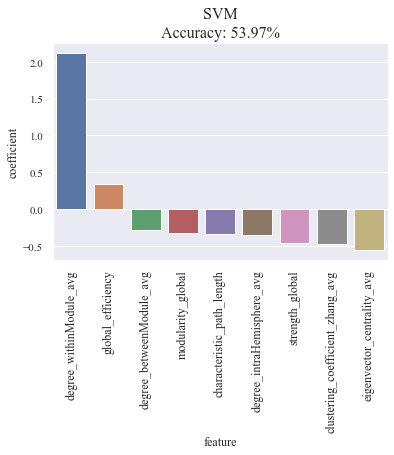

In [129]:
# Feature Selection

# Scale features
X = MinMaxScaler().fit_transform(df)
y = df.index.get_level_values('DX').to_numpy()

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Fit data to the model
clf = LinearSVC(random_state=69)
clf.fit(X_train, y_train)
selector = SelectFromModel(clf, prefit=True)

# Extract features
selected = df.iloc[:, selector.get_support()]

# Importances
coefs = pd.DataFrame({
    'feature': df.columns[selector.get_support()],
    'coefficient': clf.coef_[:, selector.get_support()].flatten()
}).sort_values('coefficient', ascending=False)

# Evaluate performance
score = clf.score(X_test, y_test)*100
print(f'Accuracy: {score:.2f}%')

# Plot feature importances
g = sns.barplot(x='feature', y='coefficient', data=coefs)
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=12);
g.set_title(f'SVM\nAccuracy: {score:.2f}%', fontsize=16)
plt.show()